# Unsupervised and Unstructured Machine Learning - Team 11
##Developers:


1.   Aaryan Bammi
2.   Pratik Mahajan
3.   Raskirt Singh Bhatia
4.   Saketh Bolina



**Mounting Dataset**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from google.colab import data_table
from google.colab import drive

data_table.enable_dataframe_formatter()

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
fda_df = pd.read_csv('/content/drive/My Drive/FDA_Food_Events.csv',low_memory=False)

In [ ]:
fda_df

report_number                                          reactions  \
0                163487  "ASPERGERS DISORDER", ATTENTION DEFICIT/HYPERA...   
1                140976                              "BARRETTS OESOPHAGUS"   
2                140976                              "BARRETTS OESOPHAGUS"   
3                109790  "BARRETTS OESOPHAGUS", DYSPHAGIA, DYSPNOEA, HY...   
4                160251                                 "BASEDOWS DISEASE"   
...                 ...                                                ...   
221172  2023-CFS-004617                              Aggression, Agitation   
221173  2023-CFS-004617                              Aggression, Agitation   
221174           169277  BLOOD ELECTROLYTES DECREASED, COUGH, CRYING, D...   
221175            71278                                               RASH   
221176            91436  ANGER, ANXIETY, CRYING, DEPRESSED MOOD, IRRITA...   

                                                 outcomes  \
0       Hospitalization, Other Serious or Important Me...   
1                Other Serious or Important Medical Event   
2                Other Serious or Important Medical Event   
3                                  Visited Emergency Room   
4                Other Serious or Important Medical Event   
...                                                   ...   
221172                        Hospitalization, Disability   
221173                        Hospitalization, Disability   
221174                             Visited Emergency Room   
221175                                      Other Outcome   
221176  Required Intervention, Congenital Anomaly, Oth...   

                                      products_brand_name  \
0       FLINTSTONES COMPLETE (MULTIVITAMINS + MINERALS...   
1       CITRACAL PLUS (CALCIUM CARBONATE + VITAMIN D) ...   
2                                               VITAMIN C   
3                              EGG BEATERS EGG SUBSTITUTE   
4          CENTRUM  (MULTIMINERALS, MULTIVITAMINS) TABLET   
...                                                   ...   
221172                                  KAVA SHACK KRATOM   
221173                             KAVA SHACK KRATOM BREW   
221174                                         CALCILO XD   
221175                 GERBER GRINS AND GIGGLES BABY WASH   
221176  EXPECTA VITAMIN SUPPLEMENT WITH DHA FOR PREGNA...   

       products_industry_code products_role  \
0                          54       SUSPECT   
1                          54       SUSPECT   
2                          54   CONCOMITANT   
3                          15       SUSPECT   
4                          54       SUSPECT   
...                       ...           ...   
221172                     54       SUSPECT   
221173                     54       SUSPECT   
221174                     40       SUSPECT   
221175                     53       SUSPECT   
221176                     54       SUSPECT   

                        products_industry_name date_created date_started  \
0       Vit/Min/Prot/Unconv Diet(Human/Animal)   2013-03-15   2003-08-13   
1       Vit/Min/Prot/Unconv Diet(Human/Animal)   2011-06-22          NaN   
2       Vit/Min/Prot/Unconv Diet(Human/Animal)   2011-06-22          NaN   
3                                 Egg/Egg Prod   2008-10-14          NaN   
4       Vit/Min/Prot/Unconv Diet(Human/Animal)   2012-12-18          NaN   
...                                        ...          ...          ...   
221172  Vit/Min/Prot/Unconv Diet(Human/Animal)   2023-05-05   2023-05-04   
221173  Vit/Min/Prot/Unconv Diet(Human/Animal)   2023-05-05   2023-05-04   
221174                      Baby Food Products   2013-08-19   2013-08-12   
221175                               Cosmetics   2004-08-12   2004-08-12   
221176  Vit/Min/Prot/Unconv Diet(Human/Animal)   2007-02-21   2007-01-23   

       consumer_gender  consumer_age consumer_age_unit  
0                 Male           NaN               NaN  
1              

# Exploratory Data Analysis (EDA)

In [ ]:
fda_df.shape

(221177, 12)

In [ ]:
fda_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 221177 entries, 0 to 221176
Data columns (total 12 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   report_number           221177 non-null  object 
 1   reactions               221177 non-null  object 
 2   outcomes                221177 non-null  object 
 3   products_brand_name     221176 non-null  object 
 4   products_industry_code  221177 non-null  object 
 5   products_role           221177 non-null  object 
 6   products_industry_name  221177 non-null  object 
 7   date_created            221177 non-null  object 
 8   date_started            152657 non-null  object 
 9   consumer_gender         210811 non-null  object 
 10  consumer_age            148700 non-null  float64
 11  consumer_age_unit       148700 non-null  object 
dtypes: float64(1), object(11)
memory usage: 20.2+ MB


In [ ]:
# Converting 'consumer_age_unit' to string
fda_df['consumer_age_unit'] = fda_df['consumer_age_unit'].astype(str)


In [ ]:
# Checking null values
fda_df.isna().sum()

report_number                 0
reactions                     0
outcomes                      0
products_brand_name           1
products_industry_code        0
products_role                 0
products_industry_name        0
date_created                  0
date_started              68520
consumer_gender           10366
consumer_age              72477
consumer_age_unit             0
dtype: int64

In [ ]:
fda_df = fda_df.dropna()
fda_df

report_number                                          reactions  \
72481            181577                    ABDOMINAL DISCOMFORT, DIARRHOEA   
72482            181577                    ABDOMINAL DISCOMFORT, DIARRHOEA   
72483            135808  ABDOMINAL DISTENSION, ABDOMINAL PAIN, CRYING, ...   
72484            193876  ABDOMINAL DISTENSION, CONSTIPATION, GASTROINTE...   
72489            157614                    ABDOMINAL PAIN UPPER, DIARRHOEA   
...                 ...                                                ...   
221172  2023-CFS-004617                              Aggression, Agitation   
221173  2023-CFS-004617                              Aggression, Agitation   
221174           169277  BLOOD ELECTROLYTES DECREASED, COUGH, CRYING, D...   
221175            71278                                               RASH   
221176            91436  ANGER, ANXIETY, CRYING, DEPRESSED MOOD, IRRITA...   

                                                 outcomes  \
72481            Other Serious or Important Medical Event   
72482            Other Serious or Important Medical Event   
72483                                       Other Outcome   
72484             Hospitalization, Visited Emergency Room   
72489                              Visited Emergency Room   
...                                                   ...   
221172                        Hospitalization, Disability   
221173                        Hospitalization, Disability   
221174                             Visited Emergency Room   
221175                                      Other Outcome   
221176  Required Intervention, Congenital Anomaly, Oth...   

                                      products_brand_name  \
72481                        FRY'S VITAMIN D MILK GRADE A   
72482                                       DAILY VITAMIN   
72483   AMBER LYN DARK CHOCOLATE ORANGE GLUTEN FREE CH...   
72484                                         EXEMPTION 4   
72489                       CRUNCH PAK SWEET APPLE SLICES   
...                                                   ...   
221172                                  KAVA SHACK KRATOM   
221173                             KAVA SHACK KRATOM BREW   
221174                                         CALCILO XD   
221175                 GERBER GRINS AND GIGGLES BABY WASH   
221176  EXPECTA VITAMIN SUPPLEMENT WITH DHA FOR PREGNA...   

       products_industry_code products_role  \
72481                      09       SUSPECT   
72482                      54   CONCOMITANT   
72483                      34       SUSPECT   
72484                      40       SUSPECT   
72489                      20       SUSPECT   
...                       ...           ...   
221172                     54       SUSPECT   
221173                     54       SUSPECT   
221174                     40       SUSPECT   
221175                     53       SUSPECT   
221176                     54       SUSPECT   

                        products_industry_name date_created date_started  \
72481              Milk/Butter/Dried Milk Prod   2014-12-17   2014-12-15   
72482   Vit/Min/Prot/Unconv Diet(Human/Animal)   2014-12-17   2014-12-15   
72483                          Choc/Cocoa Prod   2010-04-13   2010-04-12   
72484                       Baby Food Products   2016-02-24   2016-01-30   
72489                         Fruit/Fruit Prod   2012-08-14   2012-08-07   
...                                        ...          ...          ...   
221172  Vit/Min/Prot/Unconv Diet(Human/Animal)   2023-05-05   2023-05-04   
221173  Vit/Min/Prot/Unconv Diet(Human/Animal)   2023-05-05   2023-05-04   
221174                      Baby Food Products   2013-08-19   2013-08-12   
221175                               Cosmetics   2004-08-12   2004-08-12   
221176  Vit/Min/Prot/Unconv Diet(Human/Animal)   2007-02-21   2007-01-23   

       consumer_gender  consumer_age consumer_age_unit  
72481             Male           1.0           year(s)  
72482          

In [ ]:
# Checking for any remaining nulls
fda_df.isnull().sum()

report_number             0
reactions                 0
outcomes                  0
products_brand_name       0
products_industry_code    0
products_role             0
products_industry_name    0
date_created              0
date_started              0
consumer_gender           0
consumer_age              0
consumer_age_unit         0
dtype: int64

In [ ]:
# Checking unit wise distribution of Consumer Age
value_consumer_age_units = fda_df['consumer_age_unit'].value_counts()
value_consumer_age_units

consumer_age_unit
year(s)      117680
month(s)       1620
decade(s)       407
day(s)          406
week(s)         218
Name: count, dtype: int64

In [ ]:
# Defining function to standardize age values

def standardized_age(row):
    age = row['consumer_age']
    unit = row['consumer_age_unit']
    if pd.isna(age):
        return np.nan

    if unit == 'year(s)':
        return age
    elif unit == 'month(s)':
        return age / 12
    elif unit == 'day(s)':
        return age / 365
    elif unit == 'week(s)':
        return age / 52
    elif unit == 'decade(s)':
      return age * 10
    else:
        return np.nan

# Applying the function to create a new 'standardized_age' column
fda_df['standardized_age'] = fda_df.apply(standardized_age, axis=1)

fda_df= fda_df[fda_df['standardized_age'] < 125]

fda_df.drop(columns=['consumer_age', 'consumer_age_unit'], inplace=True)

fda_df

<ipython-input-13-52a408d2150b>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fda_df['standardized_age'] = fda_df.apply(standardized_age, axis=1)
<ipython-input-13-52a408d2150b>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fda_df.drop(columns=['consumer_age', 'consumer_age_unit'], inplace=True)


report_number                                          reactions  \
72481            181577                    ABDOMINAL DISCOMFORT, DIARRHOEA   
72482            181577                    ABDOMINAL DISCOMFORT, DIARRHOEA   
72483            135808  ABDOMINAL DISTENSION, ABDOMINAL PAIN, CRYING, ...   
72484            193876  ABDOMINAL DISTENSION, CONSTIPATION, GASTROINTE...   
72489            157614                    ABDOMINAL PAIN UPPER, DIARRHOEA   
...                 ...                                                ...   
221172  2023-CFS-004617                              Aggression, Agitation   
221173  2023-CFS-004617                              Aggression, Agitation   
221174           169277  BLOOD ELECTROLYTES DECREASED, COUGH, CRYING, D...   
221175            71278                                               RASH   
221176            91436  ANGER, ANXIETY, CRYING, DEPRESSED MOOD, IRRITA...   

                                                 outcomes  \
72481            Other Serious or Important Medical Event   
72482            Other Serious or Important Medical Event   
72483                                       Other Outcome   
72484             Hospitalization, Visited Emergency Room   
72489                              Visited Emergency Room   
...                                                   ...   
221172                        Hospitalization, Disability   
221173                        Hospitalization, Disability   
221174                             Visited Emergency Room   
221175                                      Other Outcome   
221176  Required Intervention, Congenital Anomaly, Oth...   

                                      products_brand_name  \
72481                        FRY'S VITAMIN D MILK GRADE A   
72482                                       DAILY VITAMIN   
72483   AMBER LYN DARK CHOCOLATE ORANGE GLUTEN FREE CH...   
72484                                         EXEMPTION 4   
72489                       CRUNCH PAK SWEET APPLE SLICES   
...                                                   ...   
221172                                  KAVA SHACK KRATOM   
221173                             KAVA SHACK KRATOM BREW   
221174                                         CALCILO XD   
221175                 GERBER GRINS AND GIGGLES BABY WASH   
221176  EXPECTA VITAMIN SUPPLEMENT WITH DHA FOR PREGNA...   

       products_industry_code products_role  \
72481                      09       SUSPECT   
72482                      54   CONCOMITANT   
72483                      34       SUSPECT   
72484                      40       SUSPECT   
72489                      20       SUSPECT   
...                       ...           ...   
221172                     54       SUSPECT   
221173                     54       SUSPECT   
221174                     40       SUSPECT   
221175                     53       SUSPECT   
221176                     54       SUSPECT   

                        products_industry_name date_created date_started  \
72481              Milk/Butter/Dried Milk Prod   2014-12-17   2014-12-15   
72482   Vit/Min/Prot/Unconv Diet(Human/Animal)   2014-12-17   2014-12-15   
72483                          Choc/Cocoa Prod   2010-04-13   2010-04-12   
72484                       Baby Food Products   2016-02-24   2016-01-30   
72489                         Fruit/Fruit Prod   2012-08-14   2012-08-07   
...                                        ...          ...          ...   
221172  Vit/Min/Prot/Unconv Diet(Human/Animal)   2023-05-05   2023-05-04   
221173  Vit/Min/Prot/Unconv Diet(Human/Animal)   2023-05-05   2023-05-04   
221174                      Baby Food Products   2013-08-19   2013-08-12   
221175                               Cosmetics   2004-08-12   2004-08-12   
221176  Vit/Min/Prot/Unconv Diet(Human/Animal)   2007-02-21   2007-01-23   

       consumer_gender  standardized_age  
72481             Male          1.000000  
72482             Male          1.000000  


In [ ]:
fda_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 120329 entries, 72481 to 221176
Data columns (total 11 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   report_number           120329 non-null  object 
 1   reactions               120329 non-null  object 
 2   outcomes                120329 non-null  object 
 3   products_brand_name     120329 non-null  object 
 4   products_industry_code  120329 non-null  object 
 5   products_role           120329 non-null  object 
 6   products_industry_name  120329 non-null  object 
 7   date_created            120329 non-null  object 
 8   date_started            120329 non-null  object 
 9   consumer_gender         120329 non-null  object 
 10  standardized_age        120329 non-null  float64
dtypes: float64(1), object(10)
memory usage: 11.0+ MB


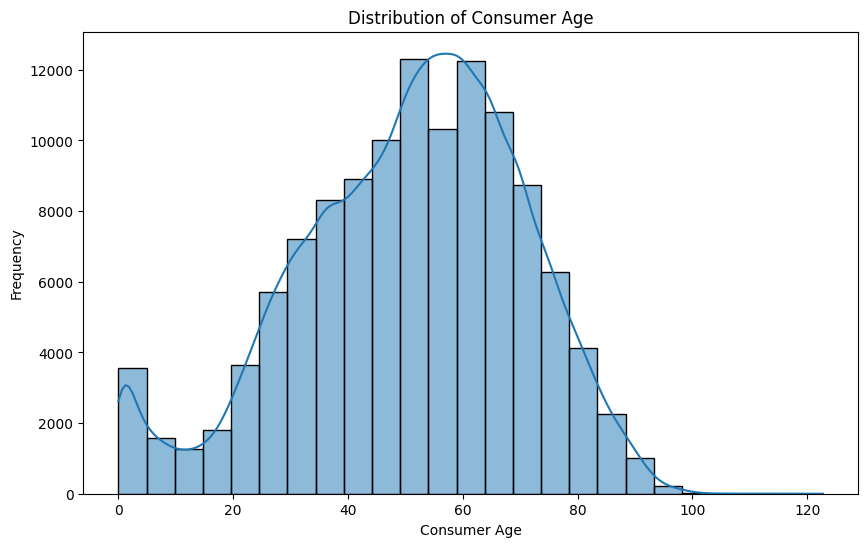

In [ ]:
# Visualizing distribution of consumer age
plt.figure(figsize=(10, 6))
sns.histplot(fda_df['standardized_age'], bins=25, kde=True)
plt.title('Distribution of Consumer Age')
plt.xlabel('Consumer Age')
plt.ylabel('Frequency')
plt.show()

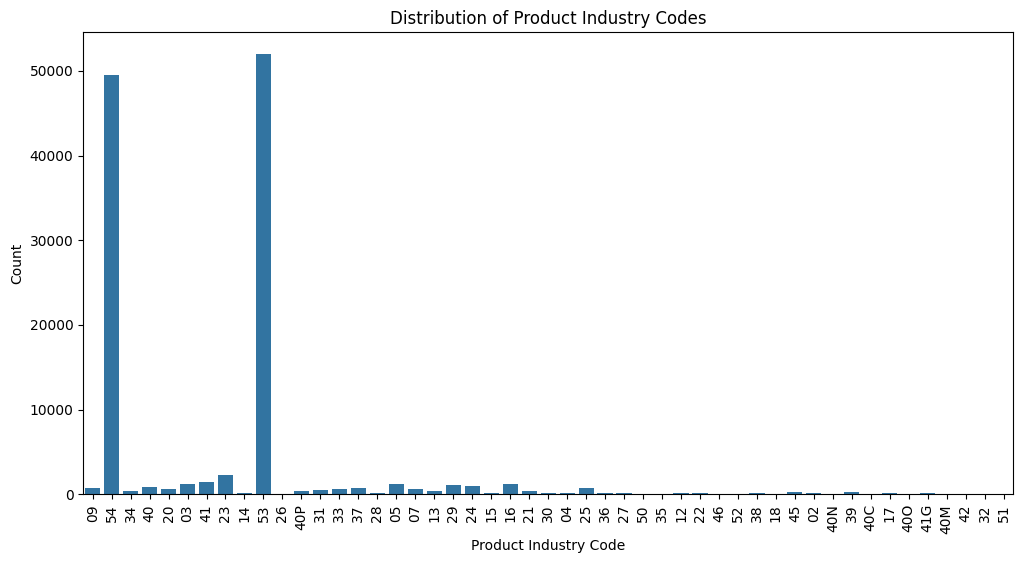

In [ ]:
# Visualizing distribution of Product Industry Codes
plt.figure(figsize=(12, 6))
sns.countplot(x='products_industry_code', data=fda_df)
plt.title('Distribution of Product Industry Codes')
plt.xlabel('Product Industry Code')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

In [ ]:
# Displaying top 10 industry codes by count
rand_df = fda_df['products_industry_code'].value_counts().sort_values(ascending=False)
top_10_count_by_industry_code = pd.DataFrame(rand_df[:10])
top_10_count_by_industry_code

count
products_industry_code       
53                      51961
54                      49524
23                       2273
41                       1429
05                       1227
16                       1183
03                       1156
29                       1086
24                        955
40                        880

In [ ]:
# Displaying top 10 industry names by count
rand_df = fda_df['products_industry_name'].value_counts().sort_values(ascending=False)
top_10_count_by_industry_name = pd.DataFrame(rand_df[:10])
top_10_count_by_industry_name

count
products_industry_name                             
Cosmetics                                     51961
Vit/Min/Prot/Unconv Diet(Human/Animal)        49524
Nuts/Edible Seed                               2273
Vegetables/Vegetable Products                  1693
Dietary Conventional Foods/Meal Replacements   1429
Cereal Prep/Breakfast Food                     1227
Fishery/Seafood Prod                           1183
Bakery Prod/Dough/Mix/Icing                    1156
Soft Drink/Water                               1086
Fruit/Fruit Prod                               1037

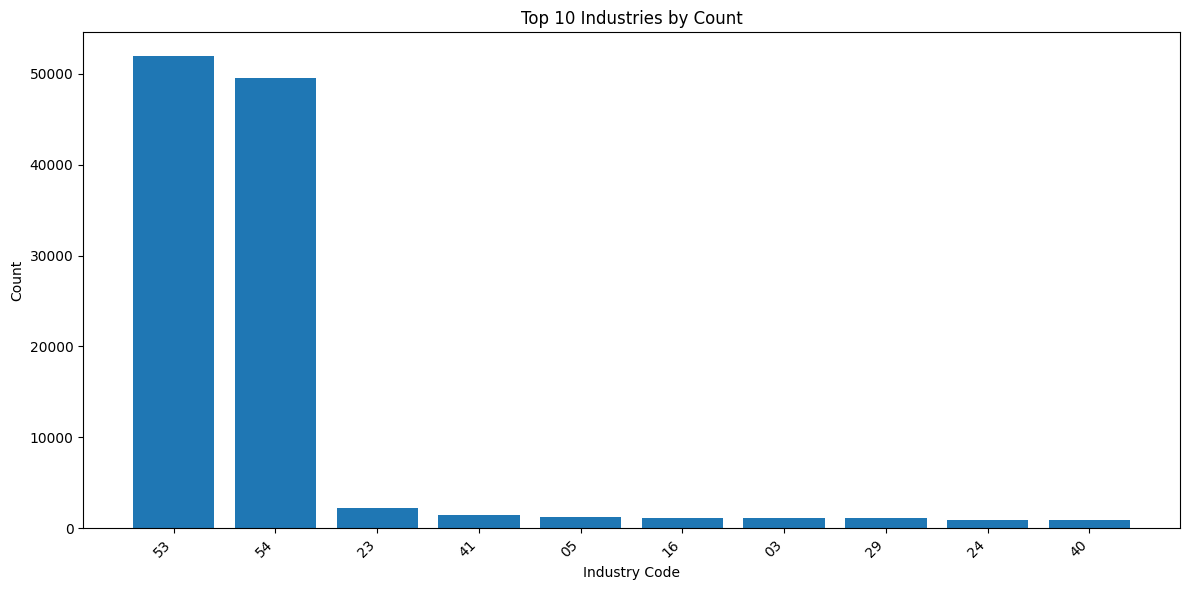

In [ ]:
# Generating bar graph for top 10 industries
plt.figure(figsize=(12, 6))
plt.bar(top_10_count_by_industry_code.index, top_10_count_by_industry_code['count'])
plt.xlabel('Industry Code')
plt.ylabel('Count')
plt.title('Top 10 Industries by Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Data Preprocessing

## Text Data Preprocessing (for NLP tasks)

In [ ]:
!pip install wordcloud
!pip install --upgrade nltk

In [ ]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize.toktok import ToktokTokenizer

# Downloading stopwords
nltk.download('stopwords')

# Defining a set of English stopwords
stop_words = set(stopwords.words('english'))

tokenizer = ToktokTokenizer()

def clean_text(text):

    text = text.lower()

    text = re.sub(r'[^a-zA-Z\s]', '', text)

    tokens = tokenizer.tokenize(text)

    tokens = [word for word in tokens if word not in stop_words]

    cleaned_text = " ".join(tokens)
    return cleaned_text

# Applying the cleaning function to the 'reactions' and 'outcomes' columns
fda_df['cleaned_reactions'] = fda_df['reactions'].apply(clean_text)
fda_df['cleaned_outcomes'] = fda_df['outcomes'].apply(clean_text)


display(fda_df[['reactions', 'cleaned_reactions']].head())
display(fda_df[['outcomes', 'cleaned_outcomes']].head())


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
<ipython-input-21-9a712f846c16>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fda_df['cleaned_reactions'] = fda_df['reactions'].apply(clean_text)
<ipython-input-21-9a712f846c16>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fda_df['cleaned_outcomes'] = fda_df['outcomes'].apply(clean_text)


reactions  \
72481                    ABDOMINAL DISCOMFORT, DIARRHOEA   
72482                    ABDOMINAL DISCOMFORT, DIARRHOEA   
72483  ABDOMINAL DISTENSION, ABDOMINAL PAIN, CRYING, ...   
72484  ABDOMINAL DISTENSION, CONSTIPATION, GASTROINTE...   
72489                    ABDOMINAL PAIN UPPER, DIARRHOEA   

                                       cleaned_reactions  
72481                     abdominal discomfort diarrhoea  
72482                     abdominal discomfort diarrhoea  
72483  abdominal distension abdominal pain crying dia...  
72484  abdominal distension constipation gastrointest...  
72489                     abdominal pain upper diarrhoea

outcomes  \
72481  Other Serious or Important Medical Event   
72482  Other Serious or Important Medical Event   
72483                             Other Outcome   
72484   Hospitalization, Visited Emergency Room   
72489                    Visited Emergency Room   

                             cleaned_outcomes  
72481         serious important medical event  
72482         serious important medical event  
72483                                 outcome  
72484  hospitalization visited emergency room  
72489                  visited emergency room

In [ ]:
# Displaying value counts of products_role
fda_df['products_role'].value_counts()

products_role
SUSPECT        97362
CONCOMITANT    22967
Name: count, dtype: int64

## Feature Engineering and Transformation

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from scipy.sparse import hstack, csr_matrix


fda_df['date_created'] = pd.to_datetime(fda_df['date_created'], errors='coerce')
fda_df['date_started'] = pd.to_datetime(fda_df['date_started'], errors='coerce')


fda_df['days_to_report'] = (fda_df['date_created'] - fda_df['date_started']).dt.days


# Combining cleaned text columns for TF-IDF

tfidf_reactions = TfidfVectorizer(max_features=100)
X_reactions = tfidf_reactions.fit_transform(fda_df['cleaned_reactions'])

# Applying TF-IDF on 'cleaned_outcomes'
tfidf_outcomes = TfidfVectorizer(max_features=100)
X_outcomes = tfidf_outcomes.fit_transform(fda_df['cleaned_outcomes'])

# Combining both text matrices using hstack
X_text_combined = hstack([X_reactions, X_outcomes])
print("Shape of combined text matrix:", X_text_combined.shape)

# Frequency encoding 'products_brand_name'
brand_freq = fda_df['products_brand_name'].value_counts()
fda_df['brand_freq_encoded'] = fda_df['products_brand_name'].map(brand_freq)
fda_df['brand_freq_encoded'] = np.log1p(fda_df['brand_freq_encoded'])


numeric_cols = ['standardized_age','days_to_report', 'brand_freq_encoded']
scaler = StandardScaler()
numeric_matrix = scaler.fit_transform(fda_df[numeric_cols])
numeric_matrix_sparse = csr_matrix(numeric_matrix)


categorical_cols = ['products_industry_code', 'consumer_gender', 'products_role']
ohe = OneHotEncoder(handle_unknown='ignore')
categorical_matrix = ohe.fit_transform(fda_df[categorical_cols])


# Combining All Features using hstack
combined_features = hstack([
    X_text_combined,
    numeric_matrix_sparse,
    categorical_matrix,
])

# Displaying final matrix shape
print("Final combined_features shape:", combined_features.shape)

<ipython-input-23-684955ca615b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fda_df['date_created'] = pd.to_datetime(fda_df['date_created'], errors='coerce')
<ipython-input-23-684955ca615b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fda_df['date_started'] = pd.to_datetime(fda_df['date_started'], errors='coerce')
<ipython-input-23-684955ca615b>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See

Shape of combined text matrix: (120329, 123)


<ipython-input-23-684955ca615b>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fda_df['brand_freq_encoded'] = fda_df['products_brand_name'].map(brand_freq)
<ipython-input-23-684955ca615b>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fda_df['brand_freq_encoded'] = np.log1p(fda_df['brand_freq_encoded'])


Final combined_features shape: (120329, 182)


In [ ]:
# Retrieving Reaction TF-IDF features
reaction_words = tfidf_reactions.get_feature_names_out()
reaction_feature_names = [f"react_{w}" for w in reaction_words]  # Prefix them to distinguish

# Retrieving Outcome TF-IDF features
outcome_words = tfidf_outcomes.get_feature_names_out()
outcome_feature_names = [f"outc_{w}" for w in outcome_words]

# Retrieving Numeric feature names
numeric_feature_names = numeric_cols  # e.g. ['standardized_age','days_to_report','brand_freq_encoded']

# Retrieving One-hot feature names
cat_feature_names = []
for col_name, categories in zip(categorical_cols, ohe.categories_):
    cat_feature_names.extend([f"{col_name}={cat}" for cat in categories])







all_feature_names = (
    reaction_feature_names
    + outcome_feature_names
    + numeric_feature_names
    + cat_feature_names
)

## Dimensionality Reduction

In [ ]:
!pip install umap-learn

In [ ]:
from sklearn.decomposition import TruncatedSVD
import umap.umap_ as umap
import matplotlib.pyplot as plt

Reduced feature matrix shape using TruncatedSVD: (120329, 50)
2D reduced shape (TruncatedSVD): (120329, 2)


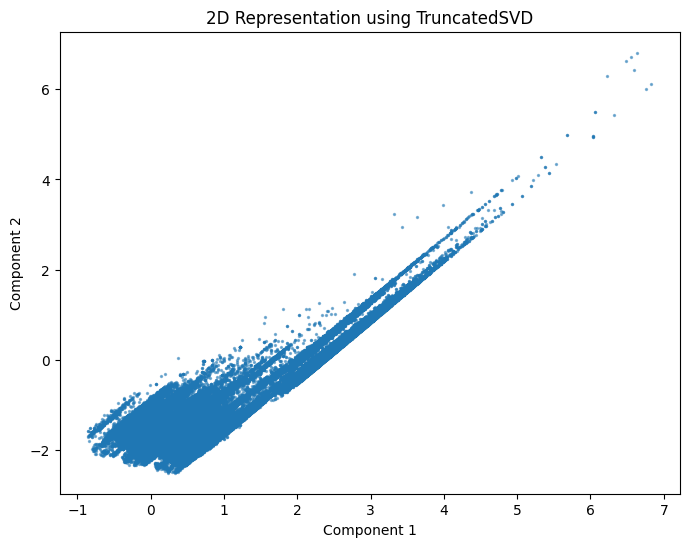

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Reduced feature matrix shape using UMAP: (120329, 2)


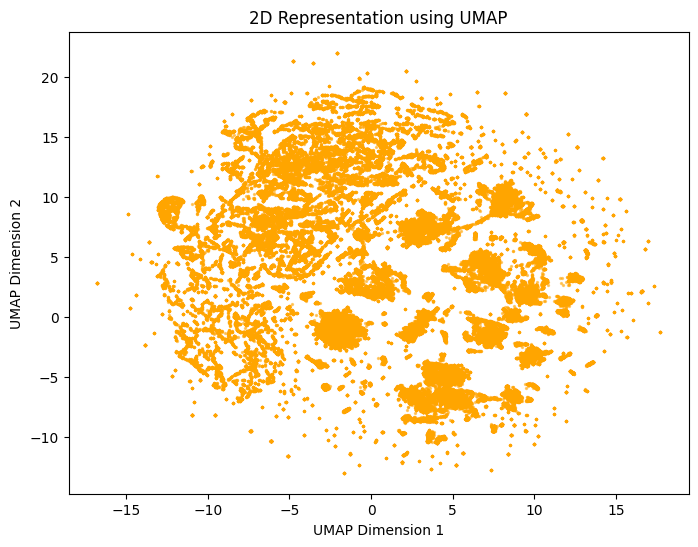

In [ ]:
### DO NOT RUN PLEASE DO NOT RUN ###
### DO NOT RUN PLEASE DO NOT RUN ###

# TruncatedSVD
svd = TruncatedSVD(n_components=50, random_state=42)
features_svd = svd.fit_transform(combined_features)
print("Reduced feature matrix shape using TruncatedSVD:", features_svd.shape)

# For visualization purposes reducing further to 2 dimensions:
svd_2d = TruncatedSVD(n_components=2, random_state=42)
features_svd_2d = svd_2d.fit_transform(combined_features)
print("2D reduced shape (TruncatedSVD):", features_svd_2d.shape)

# Plotting the 2D representation from TruncatedSVD
plt.figure(figsize=(8, 6))
plt.scatter(features_svd_2d[:, 0], features_svd_2d[:, 1], s=2, alpha=0.5)
plt.title("2D Representation using TruncatedSVD")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.show()


# UMAP
umap_reducer = umap.UMAP(n_components=2, random_state=42)
features_umap = umap_reducer.fit_transform(combined_features)
print("Reduced feature matrix shape using UMAP:", features_umap.shape)

# Plotting the 2D UMAP plot
plt.figure(figsize=(8, 6))
plt.scatter(features_umap[:, 0], features_umap[:, 1], s=2, alpha=0.5, color='orange')
plt.title("2D Representation using UMAP")
plt.xlabel("UMAP Dimension 1")
plt.ylabel("UMAP Dimension 2")
plt.show()


2D reduced shape (TruncatedSVD): (120329, 2)


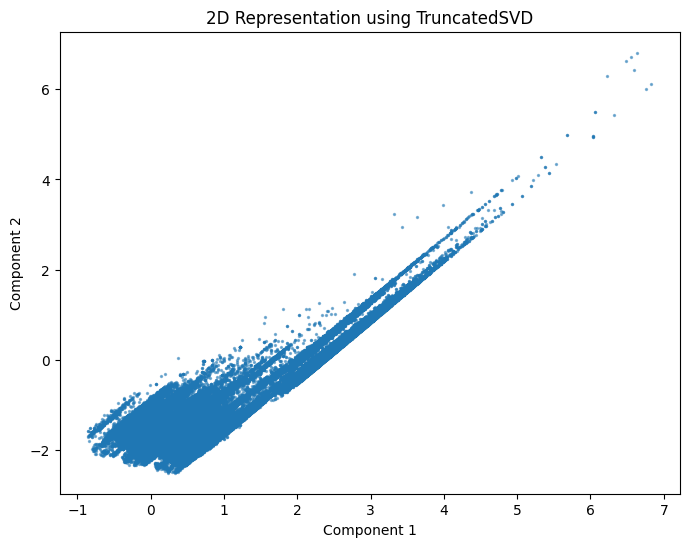

In [ ]:
# 2D SVD
svd_2d = TruncatedSVD(n_components=2, random_state=42)
features_svd_2d = svd_2d.fit_transform(combined_features)
print("2D reduced shape (TruncatedSVD):", features_svd_2d.shape)

# Plotting the 2D representation from TruncatedSVD
plt.figure(figsize=(8, 6))
plt.scatter(features_svd_2d[:, 0], features_svd_2d[:, 1], s=2, alpha=0.5)
plt.title("2D Representation using TruncatedSVD")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.show()

In [ ]:
# Dimensionality Reduction to 50D for Clustering
svd_50 = TruncatedSVD(n_components=50, random_state=42)
features_svd_50 = svd_50.fit_transform(combined_features)
print("Shape after 50D reduction:", features_svd_50.shape)


Shape after 50D reduction: (120329, 50)


In [ ]:
# Computing Loadings
from sklearn.decomposition import TruncatedSVD

svd_3 = TruncatedSVD(n_components=3, random_state=42)
features_svd_3 = svd_3.fit_transform(combined_features)

# Creating a DataFrame for the loadings
loadings_df = pd.DataFrame(
    svd_3.components_,
    index=['PC1', 'PC2', 'PC3'],
    columns=all_feature_names
)

In [ ]:
loadings_df

react_abdominal  react_abnormal  react_adverse  react_alopecia  \
PC1         0.006075        0.003622       0.000617        0.010639   
PC2        -0.036643       -0.015289      -0.004817       -0.027069   
PC3        -0.003335        0.000656      -0.001488       -0.006732   

     react_aminotransferase  react_anxiety  react_appetite  react_asthenia  \
PC1                0.000537       0.001014        0.000759        0.001547   
PC2               -0.004229      -0.006445       -0.004700       -0.007997   
PC3                0.000074      -0.000875       -0.000390        0.004865   

     react_blood  react_body  ...  products_industry_code=52  \
PC1     0.004427    0.002297  ...                   0.000017   
PC2    -0.024362   -0.010202  ...                  -0.000128   
PC3     0.013801    0.006381  ...                  -0.000078   

     products_industry_code=53  products_industry_code=54  \
PC1                   0.381669                   0.066741   
PC2                  -0.000165                  -0.357470   
PC3                  -0.066844                   0.182605   

     consumer_gender=Female  consumer_gender=Male  \
PC1                0.454736              0.009680   
PC2               -0.321681             -0.166947   
PC3                0.026141             -0.007504   

     consumer_gender=Not Reported  consumer_gender=Unknown  \
PC1                      0.000003                 0.000028   
PC2                     -0.000204                -0.000212   
PC3                     -0.000169                -0.000156   

     consumer_gender=Unspecified (or another gender identity)  \
PC1                                       5.066294e-08          
PC2                                      -7.037748e-06          
PC3                                      -7.677305e-06          

     products_role=CONCOMITANT  products_role=SUSPECT  
PC1                   0.020304               0.444144  
PC2                  -0.141025              -0.348026  
PC3                   0.118446              -0.100141  

[3 rows x 182 columns]

In [ ]:
# Computing top loadings for PC1, PC2 and PC3

for pc in ['PC1', 'PC2', 'PC3']:
    print(f"\nTop loadings for {pc}:")
    # Sorting features by absolute loading value
    sorted_features = loadings_df.loc[pc].abs().sort_values(ascending=False)
    top_feats = sorted_features.head(10).index
    # Printing the top 10 features with their loadings
    for feat in top_feats:
        loading_val = loadings_df.loc[pc, feat]
        print(f"  {feat}: {loading_val:.4f}")


Top loadings for PC1:
  consumer_gender=Female: 0.4547
  products_role=SUSPECT: 0.4441
  brand_freq_encoded: 0.3904
  products_industry_code=53: 0.3817
  days_to_report: 0.3457
  outc_event: 0.1450
  outc_medical: 0.1450
  outc_important: 0.1450
  outc_serious: 0.1440
  outc_death: 0.1322

Top loadings for PC2:
  brand_freq_encoded: 0.5052
  days_to_report: 0.4688
  products_industry_code=54: -0.3575
  products_role=SUSPECT: -0.3480
  consumer_gender=Female: -0.3217
  standardized_age: 0.1830
  consumer_gender=Male: -0.1669
  products_role=CONCOMITANT: -0.1410
  outc_outcome: -0.1154
  outc_serious: -0.0991

Top loadings for PC3:
  standardized_age: 0.9324
  days_to_report: -0.2443
  products_industry_code=54: 0.1826
  products_role=CONCOMITANT: 0.1184
  products_role=SUSPECT: -0.1001
  products_industry_code=53: -0.0668
  outc_outcome: -0.0414
  react_ovarian: -0.0305
  react_cancer: -0.0269
  consumer_gender=Female: 0.0261


## Clustering

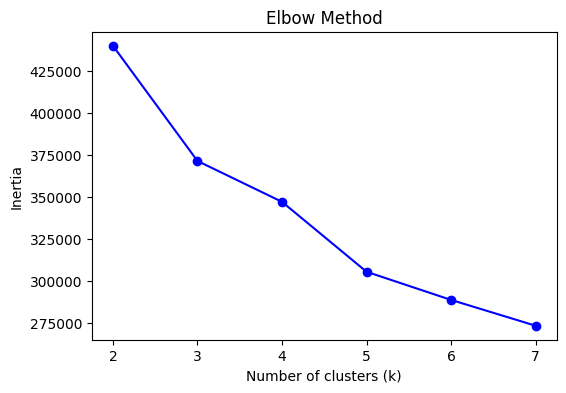

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Plotting Distortion to pick ideal K
inertias = []
K = range(2, 8)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features_svd_50)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(6, 4))
plt.plot(K, inertias, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

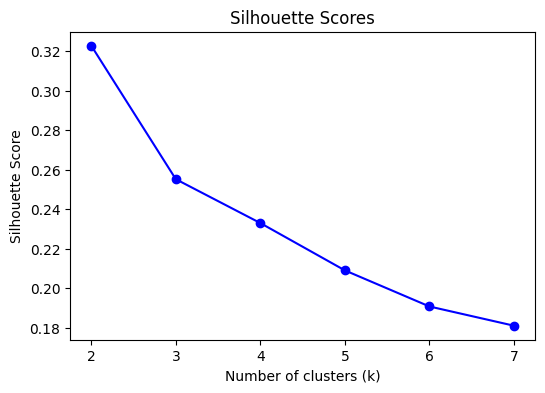

In [ ]:
# Silhouette Scores
silhouette_scores = []

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(features_svd_50)
    silhouette_avg = silhouette_score(features_svd_50, cluster_labels)
    silhouette_scores.append(silhouette_avg)

plt.figure(figsize=(6, 4))
plt.plot(K, silhouette_scores, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores')
plt.show()


In [ ]:
# Run K-Means with best K
# Based on elbow plot & silhouette scores, we have picked k = 3
best_k = 3
kmeans_final = KMeans(n_clusters=best_k, random_state=42)
clusters_final = kmeans_final.fit_predict(features_svd_50)

print(f"Chosen k = {best_k}")
print("Cluster labels distribution:", np.bincount(clusters_final))

Chosen k = 3
Cluster labels distribution: [42498 40219 37612]


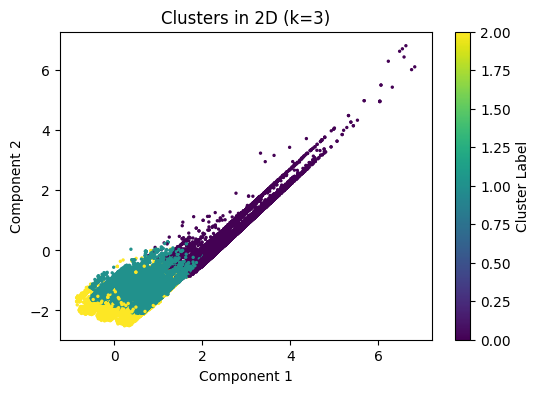

In [ ]:
# 2D Visualization

svd_2 = TruncatedSVD(n_components=2, random_state=42)
features_svd_2 = svd_2.fit_transform(features_svd_50)

plt.figure(figsize=(6, 4))
plt.scatter(features_svd_2[:, 0], features_svd_2[:, 1], c=clusters_final, s=2, cmap='viridis')
plt.title(f'Clusters in 2D (k={best_k})')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.colorbar(label='Cluster Label')
plt.show()

In [ ]:
import numpy as np
import plotly.express as px
import plotly.graph_objects as go

# Reducing Dimensions to 50D
svd_50 = TruncatedSVD(n_components=50, random_state=42)
features_svd_50 = svd_50.fit_transform(combined_features)
print("Shape after reducing to 50 components:", features_svd_50.shape)

# Running K means
best_k = 3
kmeans_final = KMeans(n_clusters=best_k, random_state=42)
clusters_final = kmeans_final.fit_predict(features_svd_50)
print("Cluster distribution:", np.bincount(clusters_final))

# Reducing to 3D for Visualization
svd_3 = TruncatedSVD(n_components=3, random_state=42)
features_svd_3 = svd_3.fit_transform(combined_features)

plot_df = pd.DataFrame({
    'PC1': features_svd_3[:, 0],
    'PC2': features_svd_3[:, 1],
    'PC3': features_svd_3[:, 2],
    'cluster': clusters_final
})

# Create a 3D Scatter Plot using Plotly
fig = px.scatter_3d(
    plot_df,
    x="PC1",
    y="PC2",
    z="PC3",
    color="cluster",
    title="3D Cluster Visualization (TruncatedSVD)"
)
fig.update_traces(marker=dict(size=2, opacity=0.7))

# Computing loadings with original feature names
loadings_df = pd.DataFrame(
    svd_3.components_,
    index=['PC1', 'PC2', 'PC3'],
    columns=all_feature_names
)

# Selecting top features (by absolute loading) for each PC
top_n = 5
selected_features = set()
for i in range(3):
    pc_name = loadings_df.index[i]
    sorted_features = loadings_df.loc[pc_name].abs().sort_values(ascending=False)
    top_feats = sorted_features.head(top_n).index.tolist()
    selected_features.update(top_feats)

selected_features = list(selected_features)
selected_loadings_df = loadings_df[selected_features]

# Adding lines and Labels for the Selected Features
for feature in selected_loadings_df.columns:
    pc1_val = selected_loadings_df.loc['PC1', feature]
    pc2_val = selected_loadings_df.loc['PC2', feature]
    pc3_val = selected_loadings_df.loc['PC3', feature]

    fig.add_trace(
        go.Scatter3d(
            x=[0, pc1_val],
            y=[0, pc2_val],
            z=[0, pc3_val],
            mode='lines',
            line=dict(color='red', width=3),
            showlegend=False
        )
    )
    # Adding Text label at the end of the arrow
    fig.add_trace(
        go.Scatter3d(
            x=[pc1_val],
            y=[pc2_val],
            z=[pc3_val],
            mode='text',
            text=[feature],  # Real feature name
            textfont=dict(size=12, color='red'),
            showlegend=False,
            textposition='middle right'
        )
    )

# Customizing axes labels and showing the plot
fig.update_layout(
    scene=dict(
        xaxis_title='PC1',
        yaxis_title='PC2',
        zaxis_title='PC3'
    )
)
fig.show()

Shape after reducing to 50 components: (120329, 50)
Cluster distribution: [42498 40219 37612]


## Topic Modeling

In [ ]:
from sklearn.decomposition import NMF

# Defining the number of topics
n_topics = 10

# Appling NMF on the combined text features
nmf_model = NMF(n_components=n_topics, random_state=42)
W = nmf_model.fit_transform(X_text_combined)  # Document-topic matrix
H = nmf_model.components_  # Topic-word matrix

# Defininf function to print top words per topic
def print_top_words(model, feature_names, n_top_words=10):
    for topic_idx, topic in enumerate(model.components_):
        top_words = [feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]
        print(f"Topic {topic_idx + 1}: {' '.join(top_words)}")

# Retrieving feature names from TF-IDF vectorizer
feature_names = tfidf_reactions.get_feature_names_out().tolist() + tfidf_outcomes.get_feature_names_out().tolist()

# Printing top words in each topic
print_top_words(nmf_model, feature_names)


Topic 1: serious important event medical alopecia choking stage malignant mesothelioma exposure
Topic 2: death death injury iii chemical malignant mesothelioma neoplasm exposure pollution
Topic 3: outcome alopecia skin pruritus rash serious burning sensation trichorrhexis hair
Topic 4: provider care health visited increased alopecia rash blood pruritus skin
Topic 5: hospitalization stage increased iii blood decreased fallopian tube disorder failure
Topic 6: cancer ovarian stage important event medical serious iii death death
Topic 7: room emergency visited increased blood pressure dizziness dyspnoea swelling rate
Topic 8: pain abdominal diarrhoea upper vomiting nausea discomfort malaise distension pyrexia
Topic 9: threatening life choking dyspnoea hypersensitivity reaction body foreign required intervention
Topic 10: disability increased disorder malaise headache nausea dizziness blood diarrhoea fatigue


1: Serious Medical Conditions - serious | important | event | medical | alopecia | choking | stage | malignant | mesothelioma | exposure
2: Fatal Reactions & Injury - death | death | injury | iii | chemical | malignant | mesothelioma | neoplasm | exposure | pollution
3: Skin & Allergic Reactions - outcome | alopecia | skin | pruritus | rash | serious | burning | sensation | trichorrhexis | hair
4: Doctor Visits & Healthcare - provider | care | health | visited | increased | alopecia | rash | blood | pruritus | skin
5: Hospitalization & Critical Cases - hospitalization | stage | increased | iii | blood | decreased | fallopian | tube | disorder | failure
6: Cancer & Tumors - cancer | ovarian | stage | important | event | medical | serious | iii | death | death
7: Emergency Room Visits - room | emergency | visited | increased | blood | pressure | dizziness | dyspnoea | swelling | rate
8: Abdominal & Gastro Issues - pain | abdominal | diarrhoea | upper | vomiting | nausea | discomfort | ma

<ipython-input-38-af959aaffe3e>:42: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



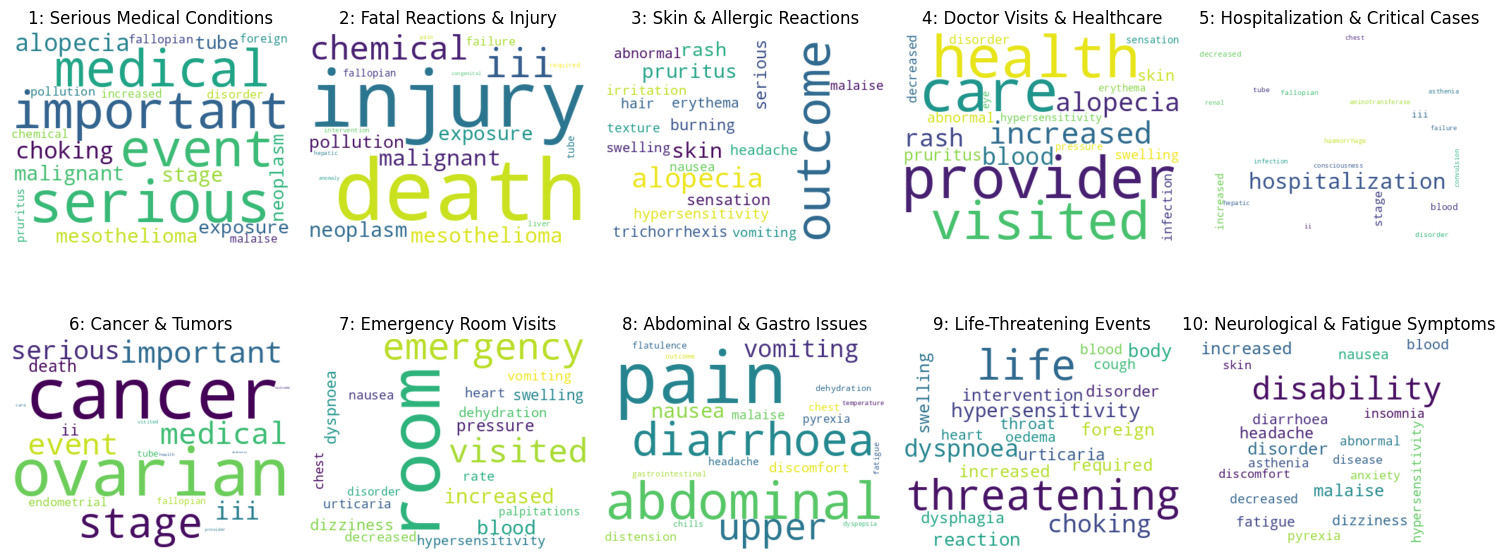

In [ ]:
import pandas as pd
import numpy as np
from sklearn.decomposition import NMF
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Number of topics to extract
n_topics = 10

# Applying NMF on the combined text features
nmf_model = NMF(n_components=n_topics, random_state=42)
W = nmf_model.fit_transform(X_text_combined)  # Document-topic matrix
H = nmf_model.components_  # Topic-word matrix

# Naming topic labels
topic_labels = {
    0: "Serious Medical Conditions",
    1: "Fatal Reactions & Injury",
    2: "Skin & Allergic Reactions",
    3: "Doctor Visits & Healthcare",
    4: "Hospitalization & Critical Cases",
    5: "Cancer & Tumors",
    6: "Emergency Room Visits",
    7: "Abdominal & Gastro Issues",
    8: "Life-Threatening Events",
    9: "Neurological & Fatigue Symptoms"
}

# Defining function to print the top words per topic
def print_top_words(model, feature_names, n_top_words=10):
    for topic_idx, topic in enumerate(model.components_):
        top_words = [feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]
        print(f"{topic_idx + 1}: {topic_labels[topic_idx]} - {' | '.join(top_words)}")

# Retrieving feature names from TF-IDF vectorizer
feature_names = tfidf_reactions.get_feature_names_out().tolist() + tfidf_outcomes.get_feature_names_out().tolist()

# Printing the top words for each topic
print_top_words(nmf_model, feature_names)

# Assigning the dominant topic to each document
fda_df['dominant_topic'] = W.argmax(axis=1)

# Visualizing the Topics using Word Clouds
fig, axes = plt.subplots(2, 5, figsize=(15, 7))  # Adjust based on number of topics
axes = axes.flatten()

for i, topic in enumerate(H):
    word_freq = {feature_names[j]: topic[j] for j in topic.argsort()[:-20 - 1:-1]}
    wordcloud = WordCloud(width=400, height=300, background_color='white').generate_from_frequencies(word_freq)
    axes[i].imshow(wordcloud, interpolation="bilinear")
    axes[i].axis('off')
    axes[i].set_title(f"{i+1}: {topic_labels[i]}")

plt.tight_layout()
plt.show()


In [ ]:
df_W = pd.DataFrame(W, columns=[f"Topic_{i+1}" for i in range(n_topics)])
df_W['dominant_topic'] = df_W.idxmax(axis=1)
df_W

Topic_1  Topic_2   Topic_3   Topic_4   Topic_5  Topic_6   Topic_7  \
0       0.042210      0.0  0.000000  0.000000  0.000000      0.0  0.000000   
1       0.042210      0.0  0.000000  0.000000  0.000000      0.0  0.000000   
2       0.000000      0.0  0.045554  0.000000  0.000000      0.0  0.000000   
3       0.000000      0.0  0.000000  0.000000  0.032492      0.0  0.097081   
4       0.000000      0.0  0.000000  0.000000  0.000000      0.0  0.103650   
...          ...      ...       ...       ...       ...      ...       ...   
120324  0.000000      0.0  0.000000  0.000000  0.040631      0.0  0.000000   
120325  0.000000      0.0  0.000000  0.000000  0.040631      0.0  0.000000   
120326  0.000000      0.0  0.000000  0.000108  0.000979      0.0  0.112995   
120327  0.000000      0.0  0.049499  0.001396  0.000000      0.0  0.000000   
120328  0.009736      0.0  0.000429  0.001185  0.001132      0.0  0.003508   

         Topic_8   Topic_9  Topic_10 dominant_topic  
0       0.040667  0.000000  0.000874        Topic_1  
1       0.040667  0.000000  0.000874        Topic_1  
2       0.055184  0.000000  0.000000        Topic_8  
3       0.013152  0.000000  0.000000        Topic_7  
4       0.066686  0.000000  0.000000        Topic_7  
...          ...       ...       ...            ...  
120324  0.000000  0.000000  0.104847       Topic_10  
120325  0.000000  0.000000  0.104847       Topic_10  
120326  0.016920  0.000291  0.001196        Topic_7  
120327  0.000000  0.000000  0.000000        Topic_3  
120328  0.000287  0.007007  0.006624        Topic_1  

[120329 rows x 11 columns]

In [ ]:
df_H = pd.DataFrame(H, columns=feature_names)
df_H

abdominal  abnormal   adverse  alopecia  aminotransferase   anxiety  \
0   0.000000  0.224241  0.000000  0.679502          0.000000  0.111876   
1   0.000000  0.000000  0.000000  0.000000          0.000000  0.000000   
2   0.000000  0.619881  0.324041  2.856238          0.000000  0.141124   
3   0.000000  0.580516  0.135861  1.009126          0.263503  0.106286   
4   0.000000  0.184040  0.000000  0.000000          0.196495  0.045072   
5   0.003112  0.000000  0.000000  0.000000          0.000000  0.000000   
6   0.000000  0.189750  0.086439  0.000000          0.027176  0.136051   
7   6.472464  0.000000  0.027417  0.000000          0.000000  0.000000   
8   0.000000  0.114958  0.087311  0.000000          0.088864  0.062452   
9   0.000000  0.213927  0.068600  0.060653          0.023724  0.168895   

   appetite  asthenia     blood      body  ...      life    medical  \
0  0.064920  0.083890  0.289089  0.288299  ...  0.000000  11.780044   
1  0.000000  0.000000  0.000000  0.000000  ...  0.000000   0.000000   
2  0.043352  0.108198  0.111178  0.216666  ...  0.000000   0.000000   
3  0.129299  0.161933  0.837705  0.144762  ...  0.000000   0.000000   
4  0.061875  0.196545  0.676993  0.000000  ...  0.000000   0.000000   
5  0.000000  0.000000  0.000000  0.000000  ...  0.000000   1.217265   
6  0.065678  0.147360  0.849445  0.089788  ...  0.000000   0.000000   
7  0.152469  0.133594  0.000000  0.072634  ...  0.000000   0.000000   
8  0.011048  0.084572  0.287038  0.538727  ...  6.107199   0.000000   
9  0.072713  0.193981  0.304937  0.000000  ...  0.000000   0.000000   

     outcome  provider  reaction  required      room    serious  threatening  \
0   0.000000  0.000000  0.014792  0.000000  0.000000  11.840164     0.000000   
1   0.000000  0.000000  0.000000  0.002900  0.000000   0.000000     0.000000   
2  20.352712  0.000000  0.005968  0.000000  0.000000   0.992320     0.000000   
3   0.000000  8.441247  0.000000  0.196494  0.000000   0.033533     0.000000   
4   0.000000  0.000000  0.000000  0.000000  0.000000   0.040971     0.000000   
5   0.004942  0.006606  0.000000  0.000000  0.000237   1.020371     0.000000   
6   0.000000  0.000000  0.020921  0.201802  5.501631   0.090639     0.000000   
7   0.212674  0.006120  0.014759  0.167531  0.000000   0.048810     0.000000   
8   0.000000  0.000000  0.119787  0.471850  0.000000   0.070579     6.107199   
9   0.000000  0.000000  0.014017  0.000000  0.000000   0.000000     0.000000   

    visited  
0  0.000000  
1  0.000000  
2  0.000000  
3  6.973250  
4  0.000000  
5  0.008807  
6  4.327232  
7  0.024420  
8  0.000000  
9  0.000000  

[10 rows x 123 columns]

In [ ]:
# Mapping 'dominant_topic' to topic labels
fda_df['topic_label'] = fda_df['dominant_topic'].map(topic_labels)



topic_analysis_df = pd.DataFrame(fda_df.groupby('topic_label')[['standardized_age', 'days_to_report']].mean())
display(topic_analysis_df)
print('\n')
topic_counts_df = pd.DataFrame(fda_df['dominant_topic'].value_counts())
display(topic_counts_df)
print('\n')
topic_variability_df = pd.DataFrame(fda_df.groupby('topic_label')[['standardized_age', 'days_to_report']].std())
display(topic_variability_df)

<ipython-input-49-48063cd385c2>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



standardized_age  days_to_report
topic_label                                                       
Abdominal & Gastro Issues                43.335524      108.869745
Cancer & Tumors                          51.479856     3443.275584
Doctor Visits & Healthcare               49.860534      219.903213
Emergency Room Visits                    47.727762       93.321303
Fatal Reactions & Injury                 60.851362     3241.756550
Hospitalization & Critical Cases         53.339027      935.558129
Life-Threatening Events                  45.155919      136.723485
Neurological & Fatigue Symptoms          46.523249      203.295288
Serious Medical Conditions               52.103409      380.411225
Skin & Allergic Reactions                41.003917      196.549161

count
dominant_topic       
0               22219
1               18969
5               16641
2               13415
6               11693
4               11053
3                9960
8                6864
9                4924
7                4591

standardized_age  days_to_report
topic_label                                                       
Abdominal & Gastro Issues                20.843734      559.404396
Cancer & Tumors                          12.953724     2686.027852
Doctor Visits & Healthcare               21.848803      550.800410
Emergency Room Visits                    21.953647      296.778098
Fatal Reactions & Injury                 13.572217     2571.292058
Hospitalization & Critical Cases         19.092447     1629.878090
Life-Threatening Events                  23.022010      516.748832
Neurological & Fatigue Symptoms          19.266125      779.107843
Serious Medical Conditions               21.172916     1203.422273
Skin & Allergic Reactions                19.269018      718.180069

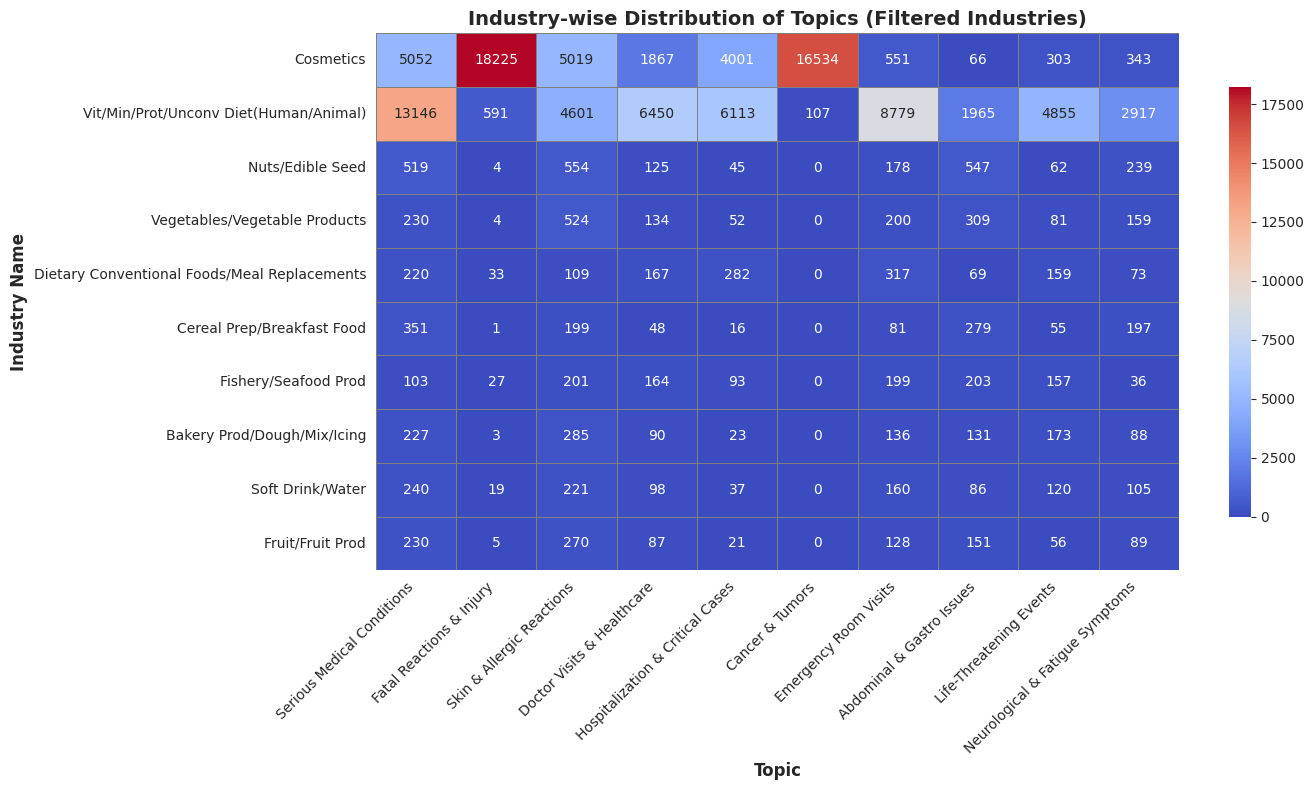

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of industries to filter
selected_industries = [
    "Cosmetics",
    "Vit/Min/Prot/Unconv Diet(Human/Animal)",
    "Nuts/Edible Seed",
    "Vegetables/Vegetable Products",
    "Dietary Conventional Foods/Meal Replacements",
    "Cereal Prep/Breakfast Food",
    "Fishery/Seafood Prod",
    "Bakery Prod/Dough/Mix/Icing",
    "Soft Drink/Water",
    "Fruit/Fruit Prod"
]

# Grouping by industry and topic, count occurrences
industry_topic_counts = fda_df.groupby(['products_industry_name', 'dominant_topic']).size().unstack(fill_value=0)

# Filtering selected industries
industry_topic_counts = industry_topic_counts.loc[industry_topic_counts.index.isin(selected_industries)]

# Sorting industries by total occurrences
industry_topic_counts = industry_topic_counts.loc[industry_topic_counts.sum(axis=1).sort_values(ascending=False).index]


plt.figure(figsize=(14, 8))
sns.set_style("whitegrid")

# Visualizing heatmap
ax = sns.heatmap(industry_topic_counts, cmap="coolwarm", annot=True, fmt="d", linewidths=0.5, linecolor='gray',
                 cbar_kws={"shrink": 0.8}, xticklabels=[topic_labels[i] for i in industry_topic_counts.columns])


plt.xticks(rotation=45, ha="right", fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel("Topic", fontsize=12, fontweight="bold")
plt.ylabel("Industry Name", fontsize=12, fontweight="bold")
plt.title("Industry-wise Distribution of Topics (Filtered Industries)", fontsize=14, fontweight="bold")


plt.tight_layout()
plt.show()
